# Modelo machine learning - Detecção de usuarios Fake

Sobre o contexto do conjunto de dados Fakes e spammers são um grande problema em todas as plataformas de mídia social, incluindo o Instagram. 

Este é o assunto do meu projeto de último ano no qual me propus a encontrar maneiras de detectá-los usando aprendizado de máquina. 

Neste conjunto de dados, fake e spammer são termos intercambiáveis. Conteúdo que identifiquei pessoalmente o spammer

Base original desse dataset - [Base dados]("https://www.kaggle.com/datasets/free4ever1/instagram-fake-spammer-genuine-accounts")

In [1]:
# Versão da Linguagem Python
from platform import python_version

print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.8


In [2]:
# Importação das bibliotecas 

import pandas as pd # Pandas carregamento csv
import numpy as np # Numpy para carregamento cálculos em arrays multidimensionais

# Visualização de dados
import seaborn as sns
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

# Carregar as versões das bibliotecas
import watermark

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Versões das bibliotecas

%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions

Author: Versões das bibliotecas

numpy     : 1.19.5
watermark : 2.3.0
matplotlib: 3.3.4
plotly    : 5.6.0
seaborn   : 0.11.1
pandas    : 1.2.4



In [5]:
# Configuração para os gráficos largura e layout dos graficos

sns.set_palette("Accent")
sns.set(style="whitegrid", color_codes=True, font_scale=1.0)
color = sns.color_palette()

# Base dados

In [6]:
# Carregando a base de dados
df = pd.read_csv("train.csv")

In [7]:
# Exibido 5 primeiros dados
df.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [8]:
# Exibido 5 últimos dados 
df.tail()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1
575,1,0.27,1,0.00,0,0,0,0,2,150,487,1


In [9]:
# Número de linhas e colunas
df.shape

(576, 12)

In [10]:
# Verificando informações das variaveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [11]:
# Exibido tipos de dados
df.dtypes

profile pic               int64
nums/length username    float64
fullname words            int64
nums/length fullname    float64
name==username            int64
description length        int64
external URL              int64
private                   int64
#posts                    int64
#followers                int64
#follows                  int64
fake                      int64
dtype: object

In [12]:
# Total de colunas e linhas 

print("Números de linhas: {}" .format(df.shape[0]))
print("Números de colunas: {}" .format(df.shape[1]))

Números de linhas: 576
Números de colunas: 12


In [13]:
# Total de número duplicados

df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
571    False
572    False
573    False
574    False
575    False
Length: 576, dtype: bool

# Estatística descritiva

In [14]:
# Exibindo estatísticas descritivas visualizar alguns detalhes estatísticos básicos como percentil, média, padrão, etc. 
# De um quadro de dados ou uma série de valores numéricos.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
profile pic,576.0,0.701389,0.458047,0.0,0.0,1.0,1.00,1.00
nums/length username,576.0,0.163837,0.214096,0.0,0.0,0.0,0.31,0.92
fullname words,576.0,1.460069,1.052601,0.0,1.0,1.0,2.00,12.00
nums/length fullname,576.0,0.036094,0.125121,0.0,0.0,0.0,0.00,1.00
name==username,576.0,0.034722,0.183234,0.0,0.0,0.0,0.00,1.00
description length,576.0,22.623264,37.702987,0.0,0.0,0.0,34.00,150.00
external URL,576.0,0.116319,0.320886,0.0,0.0,0.0,0.00,1.00
private,576.0,0.381944,0.486285,0.0,0.0,0.0,1.00,1.00
#posts,576.0,107.489583,402.034431,0.0,0.0,9.0,81.50,7389.00
#followers,576.0,85307.236111,910148.457657,0.0,39.0,150.5,716.00,15338538.00


In [15]:
# Matriz correlação de pares de colunas, excluindo NA / valores nulos.

corr = df.corr()
corr

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
profile pic,1.000000,-0.364087,0.213295,-0.131756,-0.124903,0.367892,0.236729,0.114732,0.169570,0.061137,0.194833,-0.637315
nums/length username,-0.364087,1.000000,-0.225472,0.408567,0.056890,-0.321170,-0.237125,-0.063713,-0.157442,-0.062785,-0.172413,0.587687
fullname words,0.213295,-0.225472,1.000000,-0.094348,-0.082969,0.272522,0.196562,-0.089070,0.073350,0.033225,0.094855,-0.298793
nums/length fullname,-0.131756,0.408567,-0.094348,1.000000,0.291149,-0.117521,-0.088724,-0.030030,-0.057716,-0.027035,-0.067971,0.246782
name==username,-0.124903,0.056890,-0.082969,0.291149,1.000000,-0.064814,-0.039232,0.046084,-0.049808,-0.017761,-0.009529,0.170695
description length,0.367892,-0.321170,0.272522,-0.117521,-0.064814,1.000000,0.482313,-0.110329,0.144824,0.005929,0.226561,-0.460825
external URL,0.236729,-0.237125,0.196562,-0.088724,-0.039232,0.482313,1.000000,-0.162612,0.165008,0.027189,0.142519,-0.362809
private,0.114732,-0.063713,-0.089070,-0.030030,0.046084,-0.110329,-0.162612,1.000000,-0.087495,-0.073473,-0.057542,-0.028586
#posts,0.169570,-0.157442,0.073350,-0.057716,-0.049808,0.144824,0.165008,-0.087495,1.000000,0.321385,0.098225,-0.245355
#followers,0.061137,-0.062785,0.033225,-0.027035,-0.017761,0.005929,0.027189,-0.073473,0.321385,1.000000,-0.011066,-0.093689


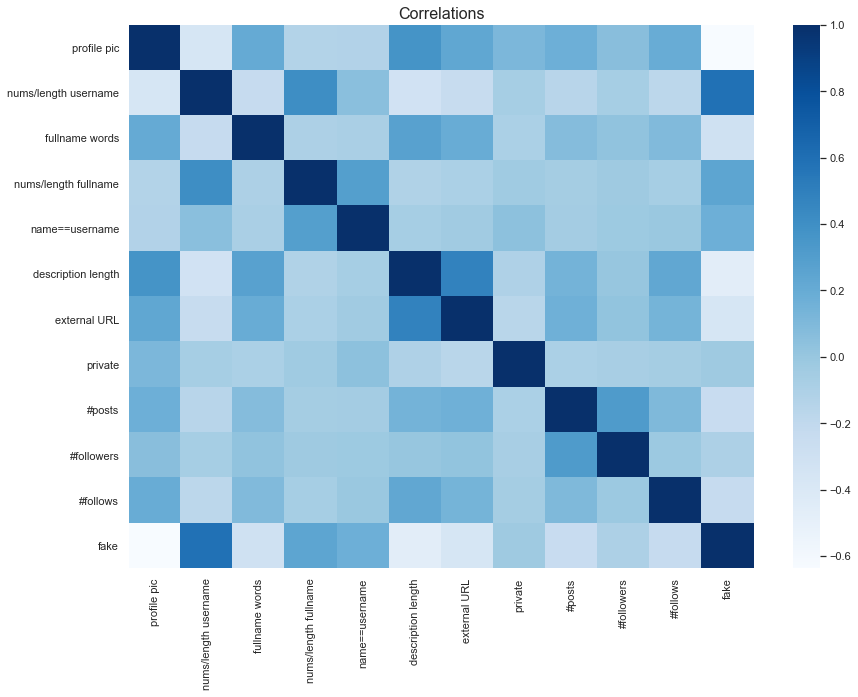

In [16]:
# Gráfico da matrz de correlação 

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap="Blues")
plt.title("Correlations", size=16)
plt.show()

Text(0.5, 1.0, 'Matriz de correlação')

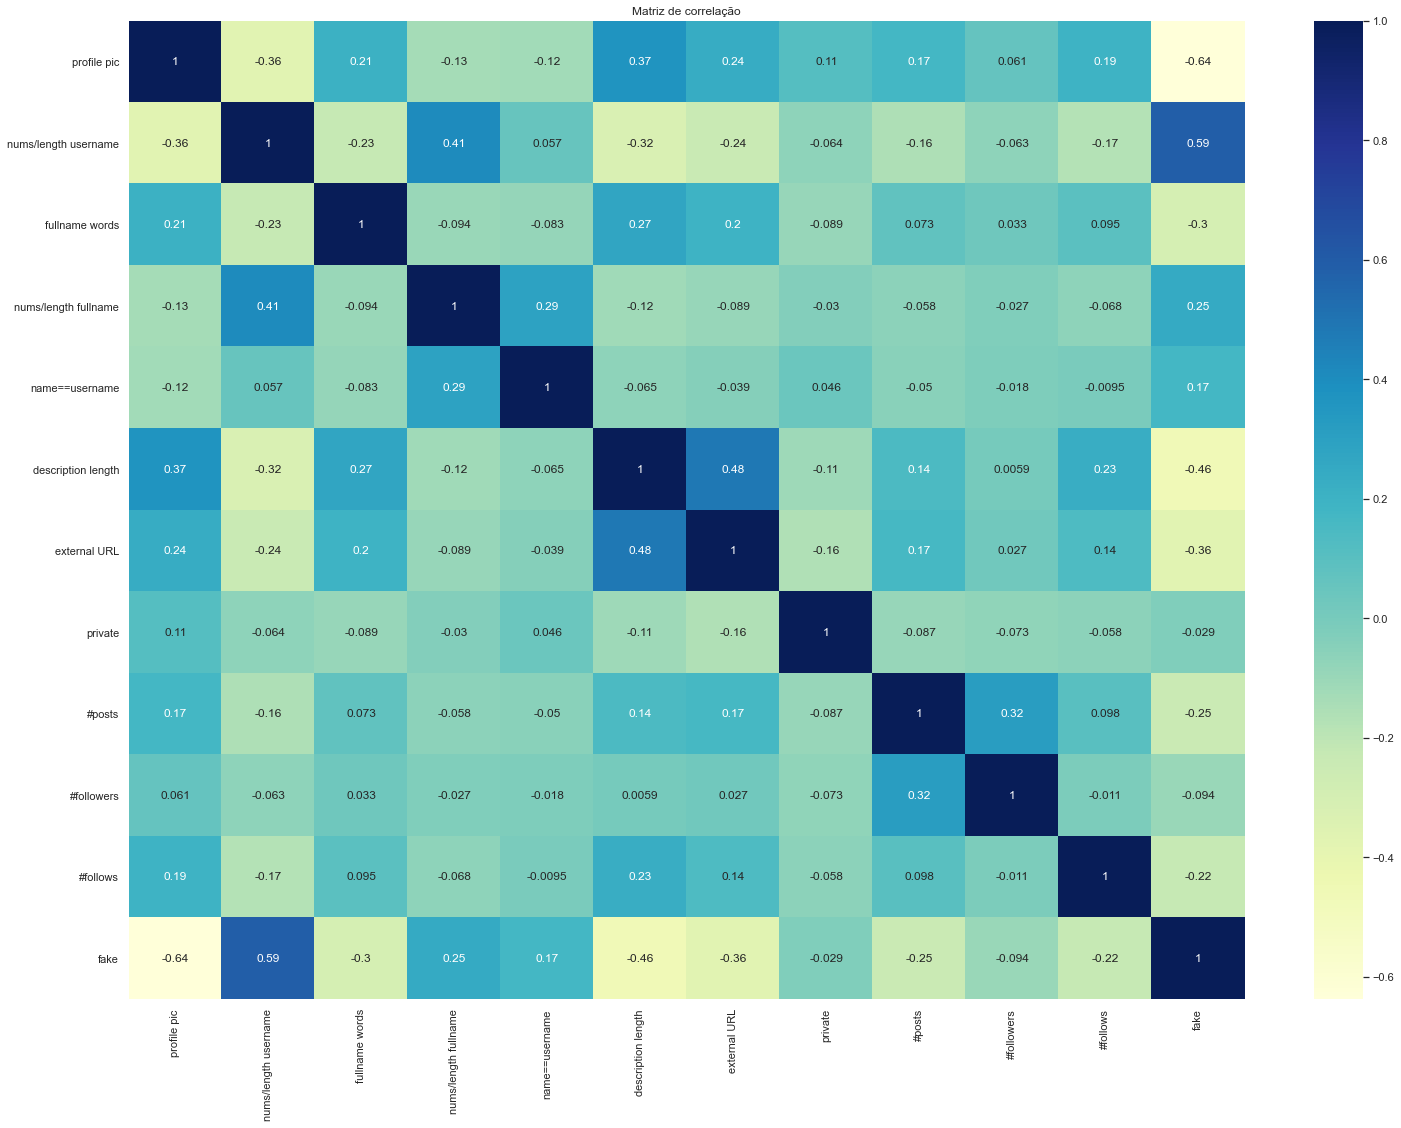

In [17]:
# Gráfico da matriz de correlação

plt.figure(figsize=(25,18))
ax = sns.heatmap(corr, annot=True, cmap='YlGnBu');
plt.title("Matriz de correlação")

# Análise de dados

Text(0.5, 0, 'Base fake')

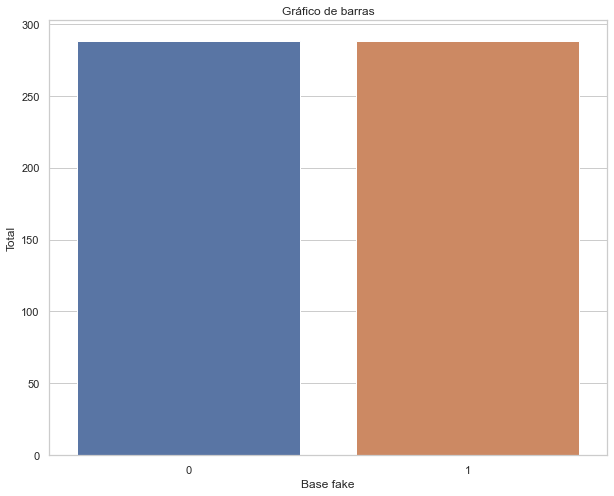

In [22]:
# Gráfico de barras
plt.figure(figsize=(10,8))

plt.title("Gráfico de barras")
sns.countplot(df["fake"])
plt.ylabel("Total")
plt.xlabel("Base fake")

Text(0, 0.5, 'Total')

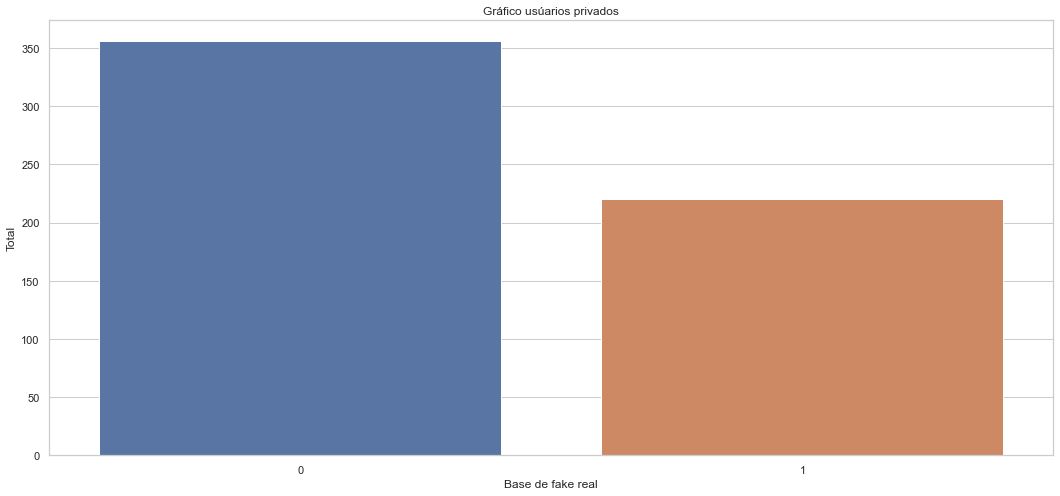

In [23]:
# Gráfico de barras

plt.figure(figsize=(18,8))
sns.countplot(df["private"])
plt.title("Gráfico usúarios privados")
plt.xlabel("Base de fake real")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

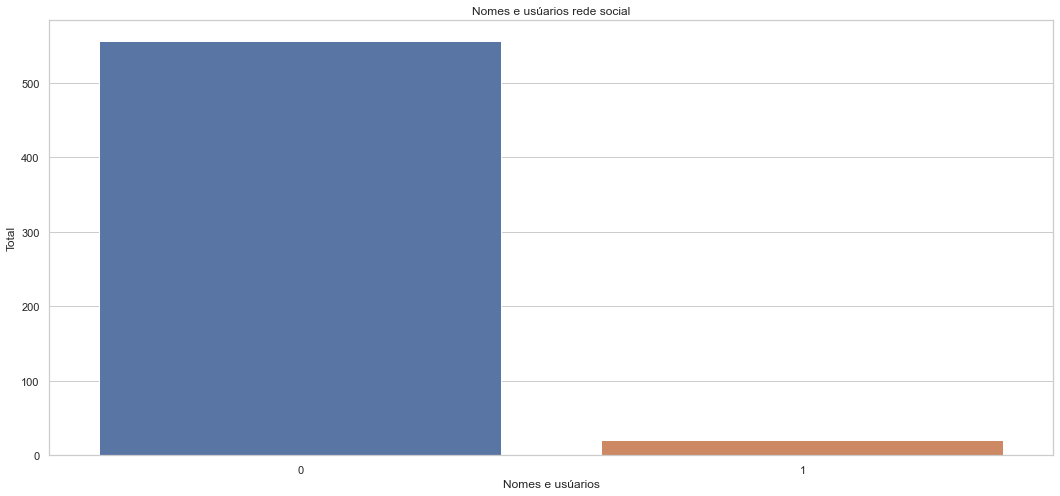

In [24]:
# Gráfico de barras
plt.figure(figsize=(18,8))

sns.countplot(df["name==username"])
plt.title("Nomes e usúarios rede social")
plt.xlabel("Nomes e usúarios")
plt.ylabel("Total")

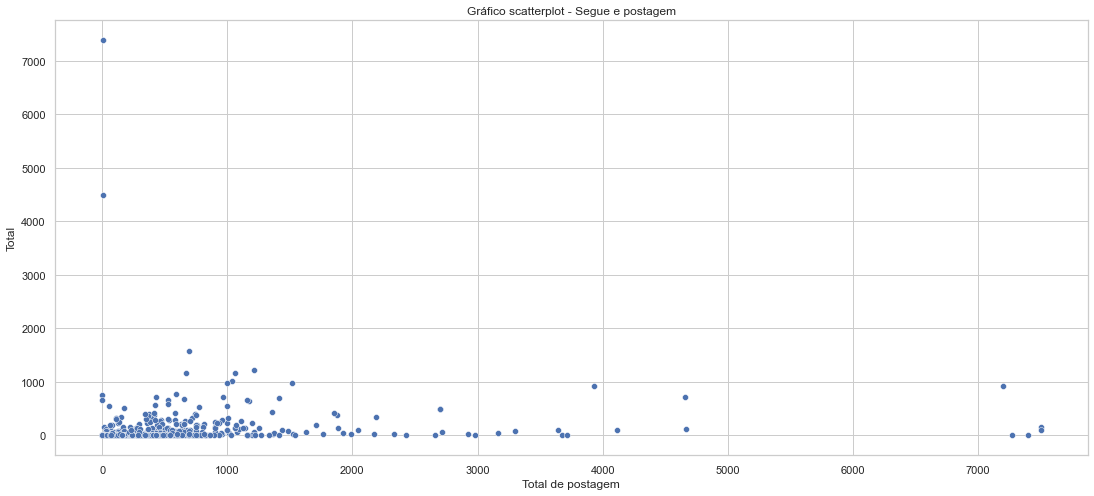

In [139]:
# Gráfico de scatterplot
plt.figure(figsize=(18.5,8))
sns.scatterplot(x="#follows", y="#posts", data = df)
plt.title("Gráfico scatterplot - Segue e postagem")
plt.xlabel("Total de postagem")
plt.ylabel("Total")
plt.show()

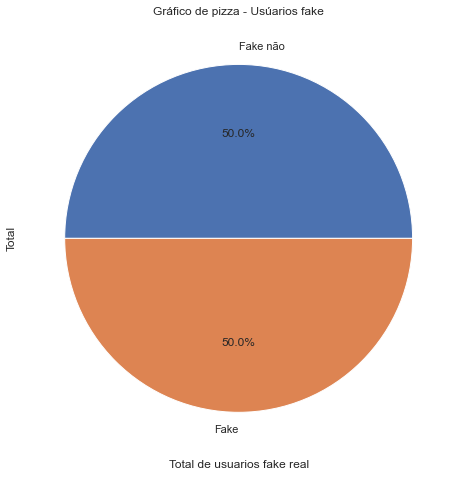

In [28]:
# Gráfico pizza 
plt.figure(figsize=(15, 8))
plt.title("Gráfico de pizza - Usúarios fake")
plt.xlabel("Total de usuarios fake real")
plt.ylabel("Total")
plt.pie(df.groupby('fake')['fake'].count(), labels=['Fake não','Fake'], autopct='%1.1f%%');

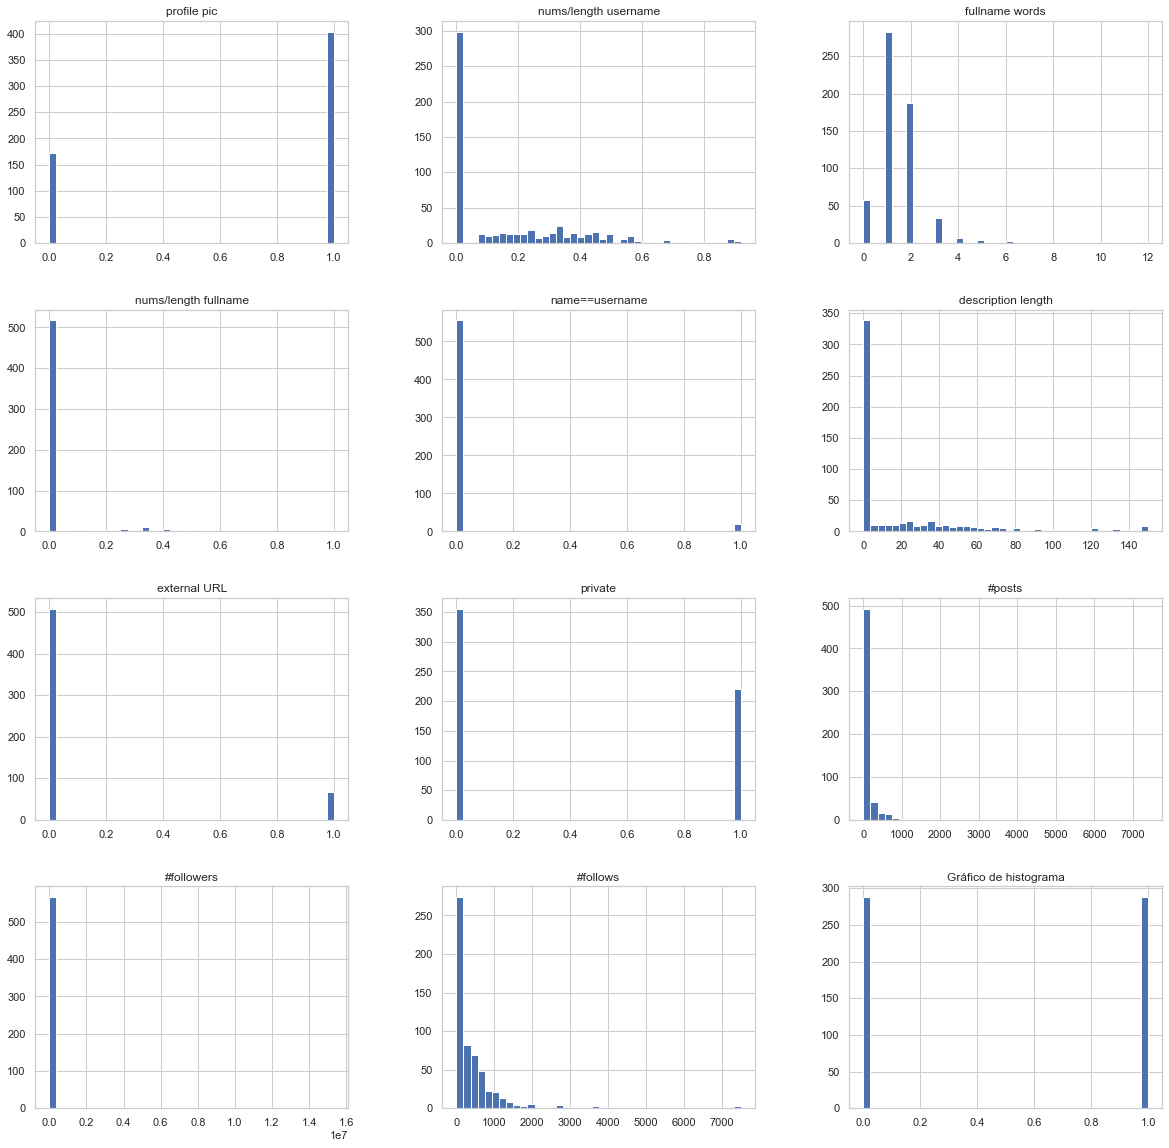

In [29]:
# Gráfico de distribuição

df.hist(bins = 40, figsize=(20.2, 20))
plt.title("Gráfico de histograma")
plt.show()

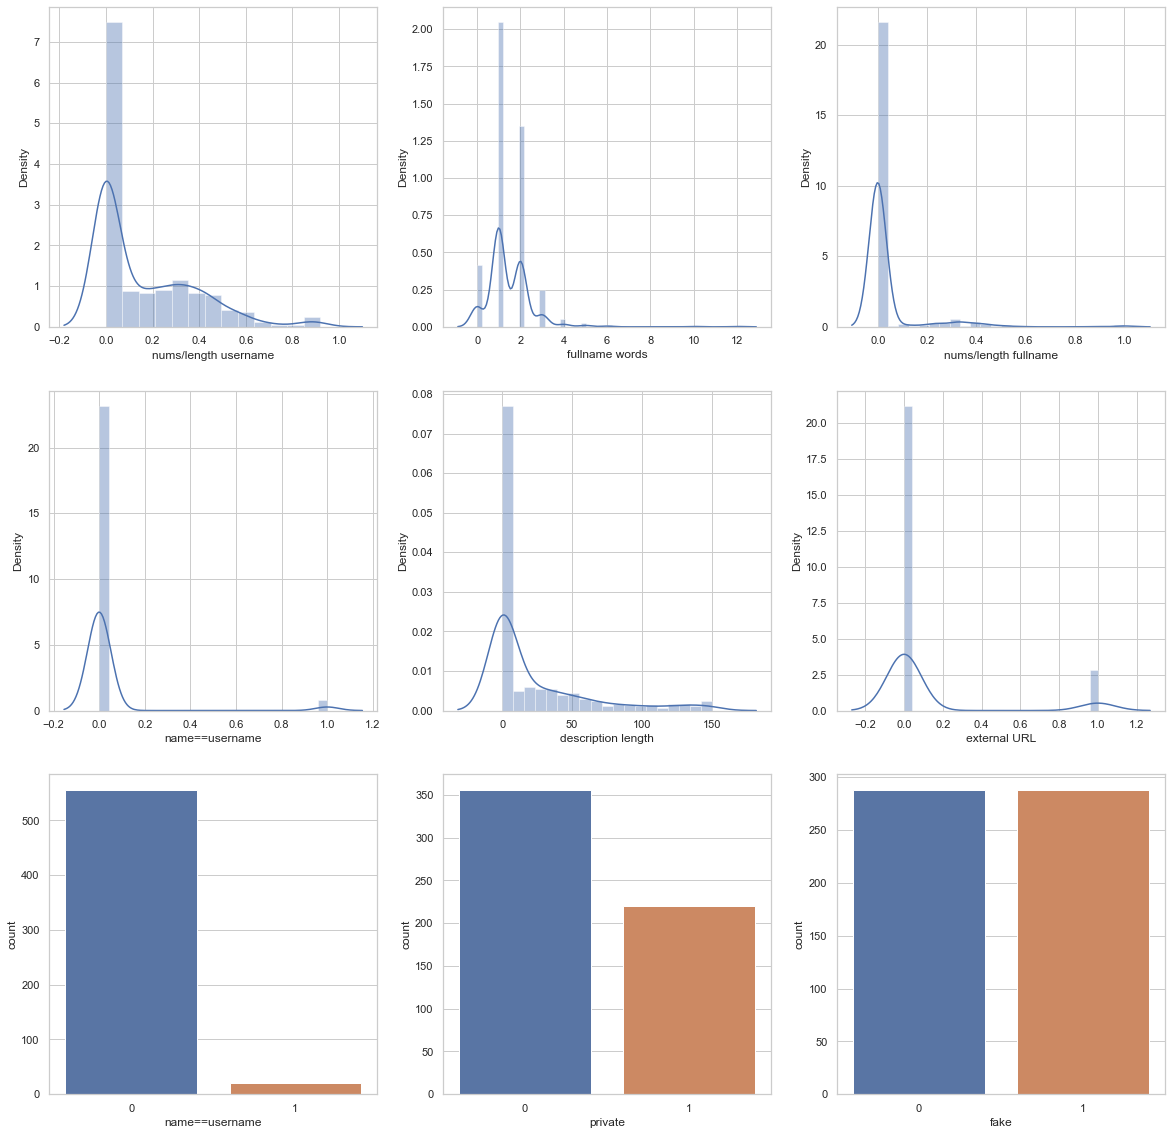

In [30]:
# Gráfico grid geral dos dados
fig1 , axes = plt.subplots(nrows=3,ncols=3 , figsize = (20,20))

sns.distplot(df["nums/length username"] , ax=axes[0, 0])
sns.distplot(df["fullname words"] ,  ax=axes[0, 1])
sns.distplot(df["nums/length fullname"] , ax=axes[0, 2])
sns.distplot(df["name==username"], ax=axes[1, 0] )
sns.distplot(df["description length"] , ax=axes[1, 1] )
sns.distplot(df["external URL"] , ax=axes[1, 2] )
sns.countplot(df["name==username"] , ax=axes[2, 0])
sns.countplot(df["private"], ax=axes[2, 1])
sns.countplot(df["fake"], ax=axes[2, 2])

plt.show()

# Pré - processamento de dados
O processamento de dados começa com os dados em sua forma bruta e os converte em um formato mais legível (gráficos, documentos, etc.), dando-lhes a forma e o contexto necessários para serem interpretados por computadores e utilizados.
Exemplo: Uma letra, um valor numérico. Quando os dados são vistos dentro de um contexto e transmite algum significado, tornam-se informações

In [32]:
# Verificando se a variável resposta está balanceada

df_teg = df.fake.value_counts()
df_teg

0    288
1    288
Name: fake, dtype: int64

In [33]:
# Instalando o pacote imblearn
#!pip install -q imblearn

import imblearn
# Versão do pacote imblearn

print("Versão Imblearn",imblearn.__version__)

Versão Imblearn 0.7.0


In [34]:
# Variáveis explicativas
df.iloc[:, 0:31].head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [35]:
# Variável Target
df.iloc[:, 11].head()

0    0
1    0
2    0
3    0
4    0
Name: fake, dtype: int64

**Balanceamento de Classe - ROSE Random Over Sampling**

In [36]:
# Defenindo base de treino e teste train e test

x = df.drop(["name==username"], axis = 1)
y = df["name==username"]

In [37]:
# Visualizando linha e coluna da váriavel x
x.shape

(576, 11)

In [38]:
# Visualizando linha e coluna da váriavel y
y.shape

(576,)

In [39]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

model_rose = RandomOverSampler(sampling_strategy='minority')
model_rose = RandomOverSampler(sampling_strategy=0.5)
x_rs, y_rs = model_rose.fit_resample(x, y)

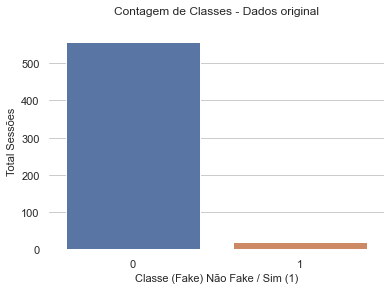

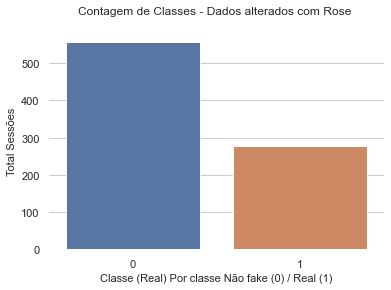

In [41]:
# Plot 
sns.countplot(df["name==username"])
plt.box(False)
plt.xlabel('Classe (Fake) Não Fake / Sim (1)', fontsize = 11)
plt.ylabel('Total Sessões', fontsize = 11)
plt.title('Contagem de Classes - Dados original\n')
plt.show()

# Plot 
sns.countplot(y_rs)
plt.box(False)
plt.xlabel('Classe (Real) Por classe Não fake (0) / Real (1)', fontsize = 11)
plt.ylabel('Total Sessões', fontsize = 11)
plt.title('Contagem de Classes - Dados alterados com Rose \n')
plt.show()

In [42]:
# Shape dos dados originais x
x.shape

(576, 11)

In [43]:
# Shape dos dados originais y
y.shape

(576,)

In [44]:
# Shape dos dados reamostrados 
x_rs.shape

(834, 11)

In [45]:
# Shape dos dados reamostrados 
y_rs.shape

(834,)

In [46]:
# Ajustando X e y
x1 = x_rs
y1 = y_rs

# Treino e Teste
- Treino e teste da base de dados da coluna fake

In [47]:
# Defenindo base de treino e teste train e test

train = df.drop(["fake"], axis = 1)
test = df["fake"]

In [48]:
# Visualizando linha e coluna da váriavel x
train.shape

(576, 11)

In [49]:
# Visualizando linha e coluna da váriavel y
test.shape

(576,)

# Escalonamento

In [61]:
from sklearn.preprocessing import StandardScaler

scaler_pre = StandardScaler()
scaler_pre_fit_train = scaler_pre.fit_transform(train)
scaler_pre_fit_train

array([[ 0.65248952,  0.49629929, -1.38831247, ..., -0.18793216,
        -0.09271072,  0.48694486],
       [ 0.65248952, -0.76591601,  0.51339498, ...,  0.44440367,
        -0.09079728,  0.02684091],
       [ 0.65248952, -0.29842886,  0.51339498, ..., -0.23523287,
        -0.09363554, -0.44743686],
       ...,
       [ 0.65248952,  1.89876073,  0.51339498, ..., -0.25763847,
        -0.09370482, -0.18467607],
       [ 0.65248952,  1.89876073, -0.43745874, ..., -0.26759651,
        -0.09374771, -0.4746942 ],
       [ 0.65248952,  0.49629929, -0.43745874, ..., -0.26261749,
        -0.09364544, -0.0233126 ]])

In [51]:
scaler_pre_fit_train.shape

(576, 11)

# Treino e teste

- Treino e teste do modelo machine learning 80 para dados de treino 20 para dados de teste


- train_test_split: O train test split ele define o conjunto de dados de treinamento os dados em float deve estar entre 0.0 e 1 vai ser definirá o conjunto de dados teste.


- Test_size: E o tamanho do conjunto de teste para ser usando dados de teste 0.25 ou 25 por cento.


- Random_state: Devisão dos dados ele um objeto para controla a randomização durante a devisão dos dados

In [52]:
# Treinando modelo machine learning e treino do modelo
from sklearn.model_selection import train_test_split

# Divisão em Dados de Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(train, 
                                                    test, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [53]:
# Total de linhas e colunas e linhas dos dados de treino x
x_train.shape

(403, 11)

In [54]:
# Total de linhas dos dados de treino y
x_train.shape

(403, 11)

In [55]:
# Total de linhas e colunas dos dados de treino x teste 
x_test.shape

(173, 11)

In [56]:
# Total de linhas e colunas dos dados de treino y teste 
y_test.shape

(173,)

# Modelo machine learning - 1
**Modelo 01 - Decision Tree Classifier**

In [57]:
# Modelo - Decision tree classifier

# Importação da biblioteca
from sklearn.tree import DecisionTreeClassifier

# Nome do algoritmo M.L
model_decision_tree = DecisionTreeClassifier(max_depth = 5) 

# Treinamento do modelo
model_decision_tree_fit = model_decision_tree.fit(x_train, y_train)

# Score do modelo
model_decision_tree_scor = model_decision_tree.score(x_train, y_train) 
print("Modelo - Decision Tree Classifier: %.2f" % (model_decision_tree_scor * 100)) # Score do modelo dados treino y

Modelo - Decision Tree Classifier: 95.53


In [58]:
# Previsão do modelo
model_decision_tree_pred = model_decision_tree.predict(x_test)
model_decision_tree_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1],
      dtype=int64)

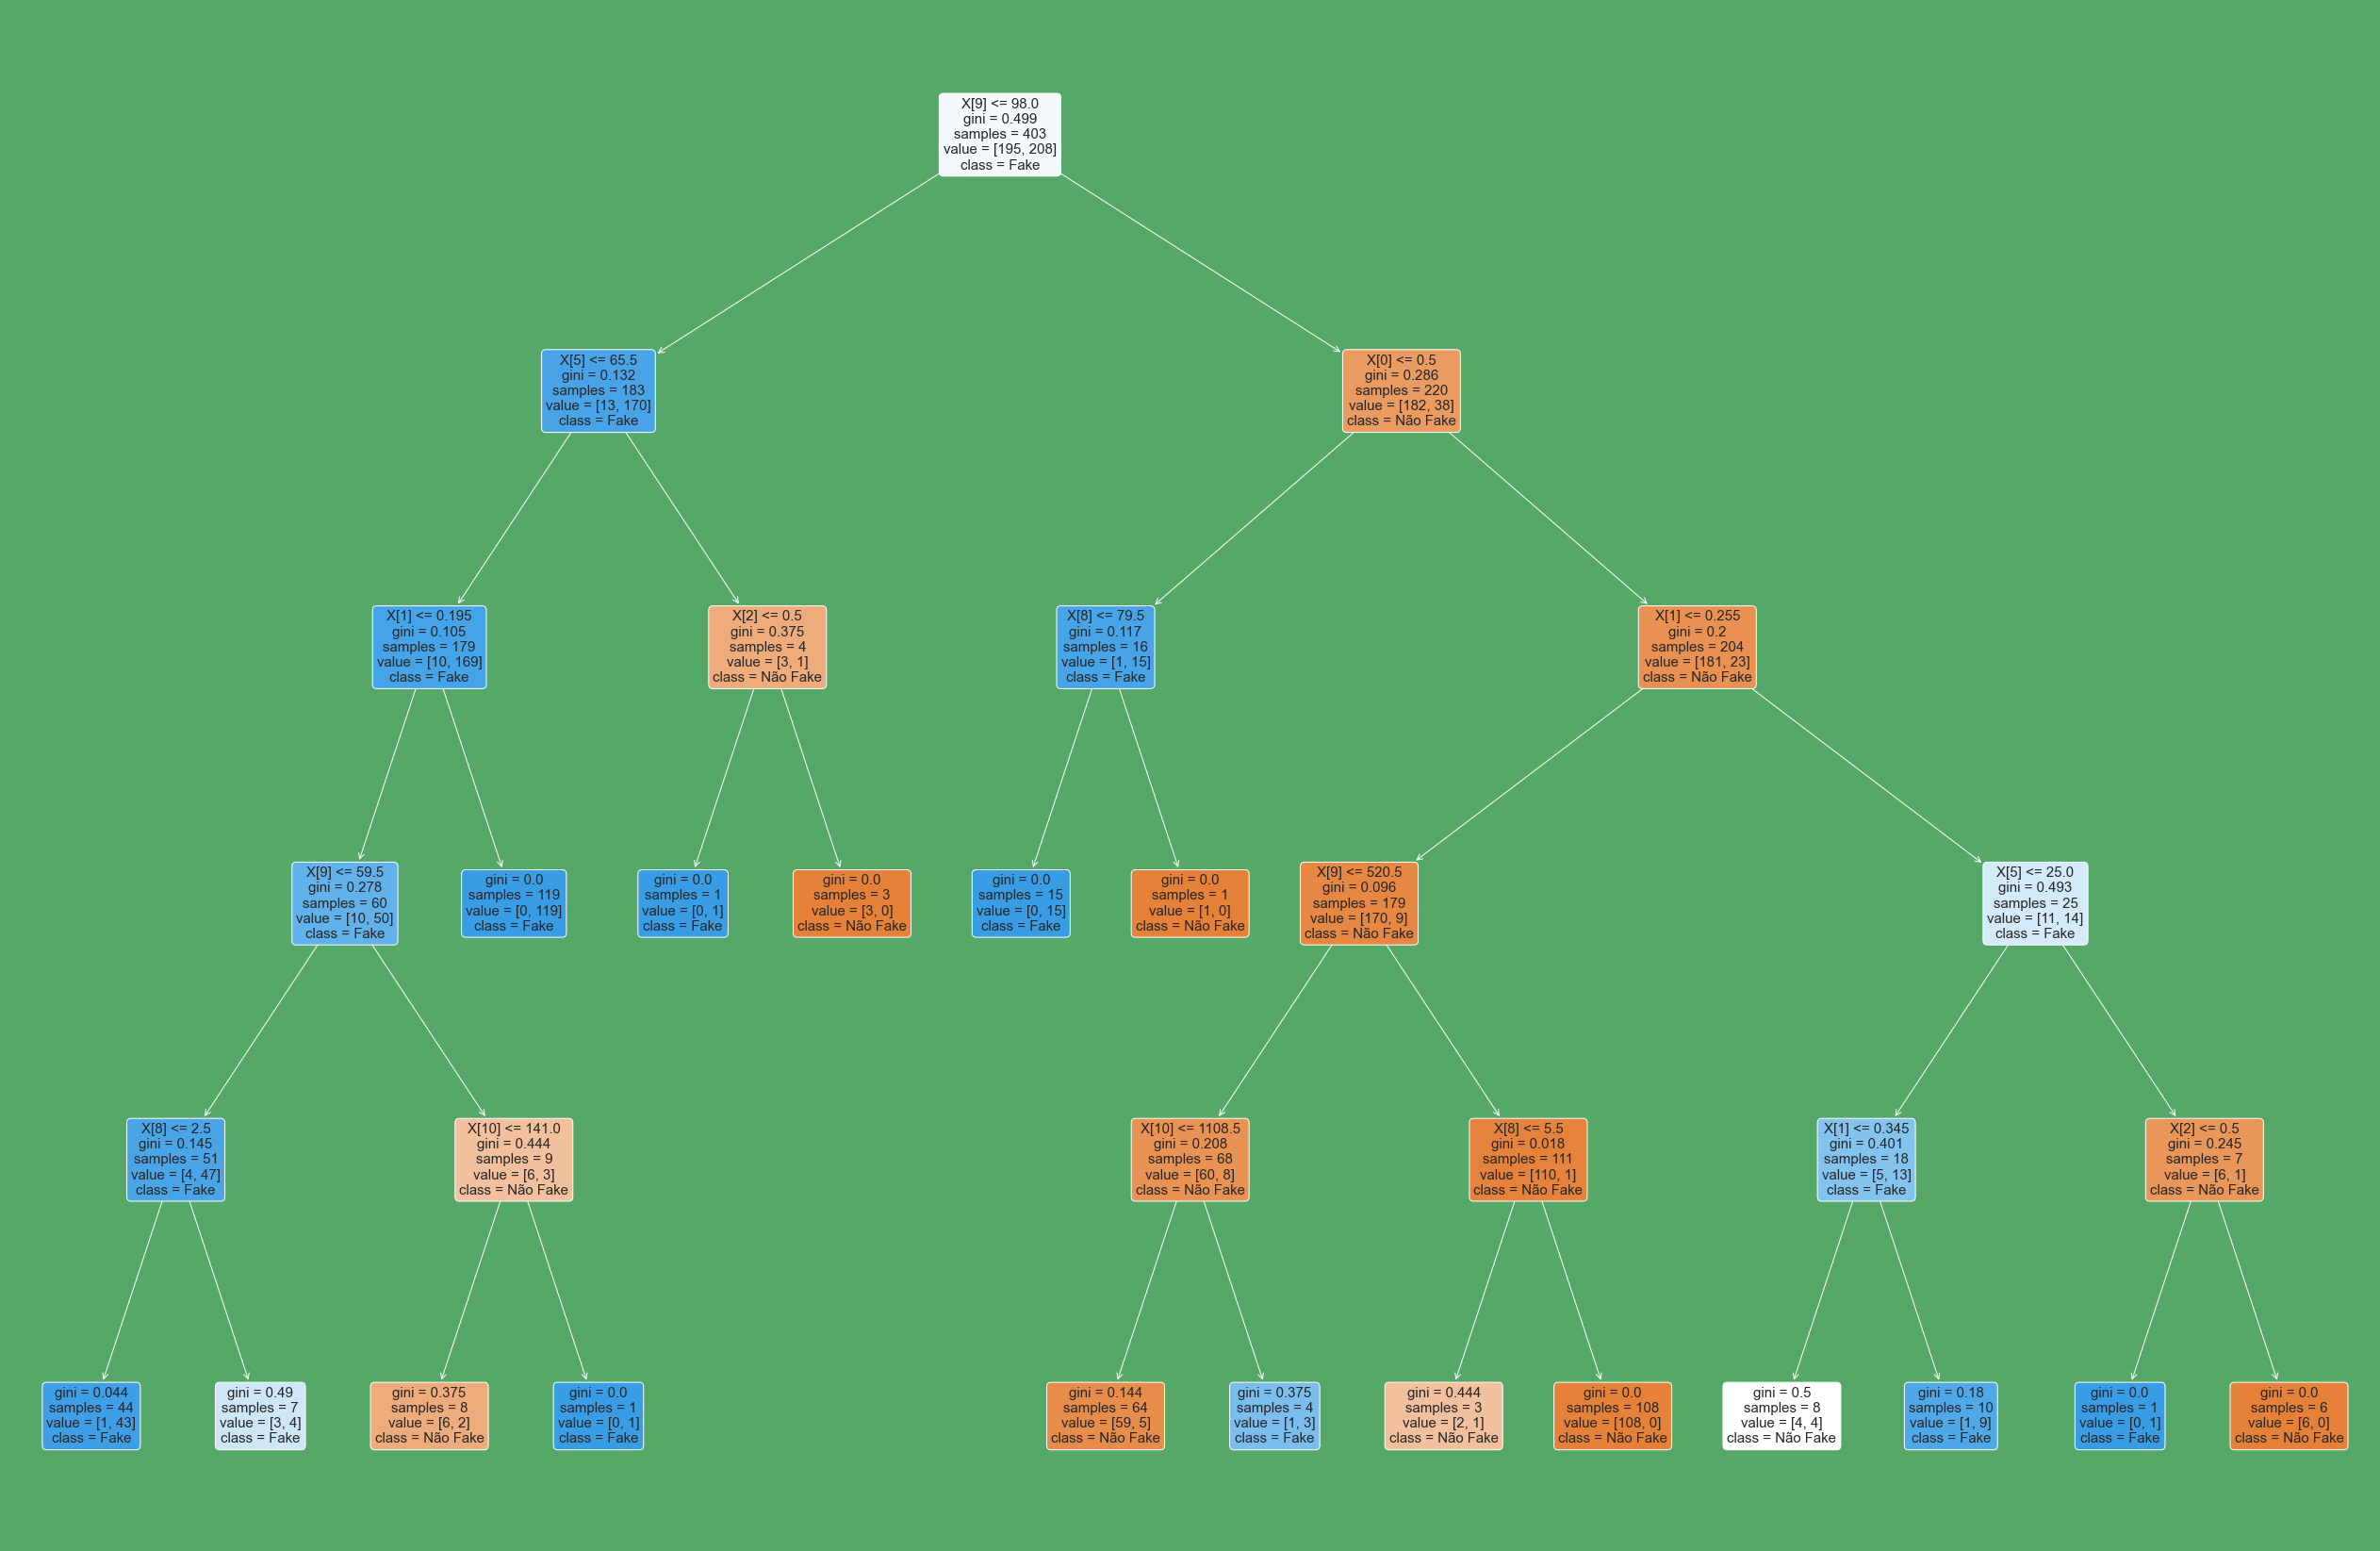

In [121]:
# Gráfico da árvore
from sklearn import tree

fig, ax = plt.subplots(figsize=(45, 30), facecolor = "g")
tree.plot_tree(model_decision_tree, 
               ax = ax, 
               fontsize = 15, 
               rounded = True, 
               filled = True, 
               class_names = ["Não Fake", "Fake"])
plt.show()

In [63]:
# Accuracy do modelo 
from sklearn.metrics import accuracy_score

accuracy_dt = accuracy_score(y_test, model_decision_tree_pred)
print("Acurácia - Decision Tree Classifier: %.2f" % (accuracy_dt * 100))

Acurácia - Decision Tree Classifier: 87.28


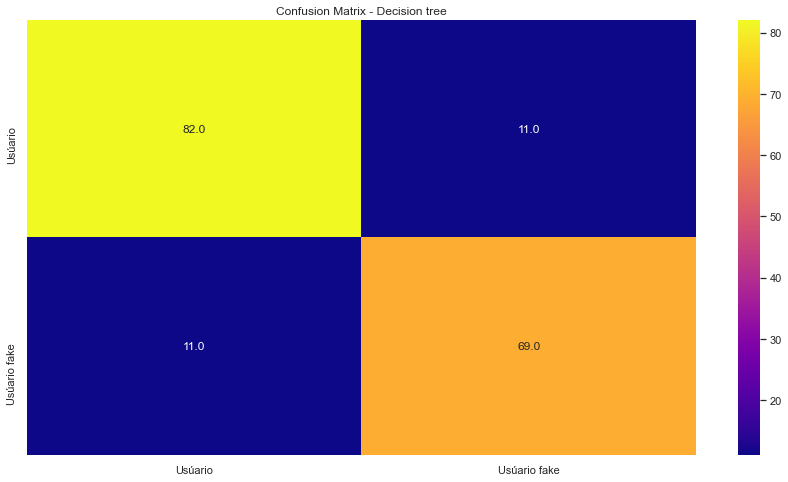

In [66]:
# Matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

matrix_confusion = confusion_matrix(y_test, model_decision_tree_pred)

# Plot matriz de confusão
plt.figure(figsize=(15, 8))

ax = plt.subplot()
sns.heatmap(matrix_confusion, 
            annot=True, 
            ax = ax, 
            fmt = ".1f", 
            cmap="plasma"); 
ax.set_title('Confusion Matrix - Decision tree'); 
ax.xaxis.set_ticklabels(["Usúario", "Usúario fake"]); ax.yaxis.set_ticklabels(["Usúario", "Usúario fake"]);

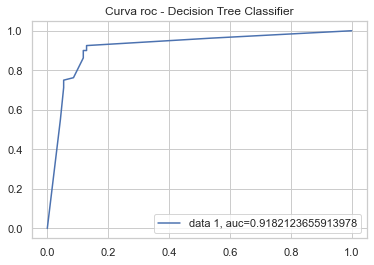

In [67]:
# Cruva roc do modelo
from sklearn import metrics

roc_g = model_decision_tree.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  roc_g)
auc = metrics.roc_auc_score(y_test, roc_g)

plt.title("Curva roc - Decision Tree Classifier")
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [69]:
# Classification report
from sklearn.metrics import classification_report
classification = classification_report(y_test, model_decision_tree_pred)

print("Modelo - Decision Tree Classifier")
print()
print(classification)

Modelo - Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        93
           1       0.86      0.86      0.86        80

    accuracy                           0.87       173
   macro avg       0.87      0.87      0.87       173
weighted avg       0.87      0.87      0.87       173



In [70]:
# Métricas do modelos
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision = precision_score(y_test, model_decision_tree_pred)
Recall = recall_score(y_test, model_decision_tree_pred)
Accuracy = accuracy_score(y_test, model_decision_tree_pred)
F1_Score = f1_score(y_test, model_decision_tree_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
2,Accuracy,0.872832
0,precision,0.862500
1,Recall,0.862500
3,F1_Score,0.862500


**Modelo 02 - KNN**

In [71]:
%%time

# Importando biblioteca 
from sklearn.neighbors import KNeighborsClassifier

# Nome do algoritmo M.L
model_knn = KNeighborsClassifier(n_neighbors = 10)

# Treinamento do modelo
model_knn_fit = model_knn.fit(x_train, y_train)

# Score do modelo
model_knn_score = model_knn.score(x_train, y_train)
print("Modelo - K-NN: %.2f" % (model_knn_score * 100))

Modelo - K-NN: 91.07
Wall time: 30.9 ms


In [72]:
# Previsão do modelo
model_knn_pred = model_knn.predict(x_test)
model_knn_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1],
      dtype=int64)

In [73]:
# Accuracy score
accuracy_knn = accuracy_score(y_test, model_knn_pred)
print("Acurácia - K-NN: %.2f" % (accuracy_knn * 100))

Acurácia - K-NN: 89.02


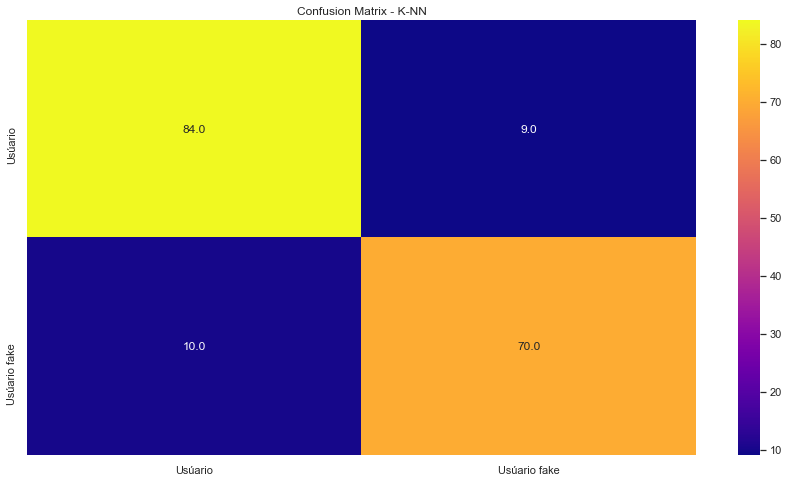

In [76]:
# Confusion matrix
matrix_confusion_3 = confusion_matrix(y_test, model_knn_pred)

# Plot confusion matrix
plt.figure(figsize=(15, 8))
ax = plt.subplot()

sns.heatmap(matrix_confusion_3, 
            annot = True, 
            ax = ax, 
            fmt = ".1f", 
            cmap="plasma"); 

ax.set_title('Confusion Matrix - K-NN'); 
ax.xaxis.set_ticklabels(["Usúario", "Usúario fake"]); ax.yaxis.set_ticklabels(["Usúario", "Usúario fake"]);

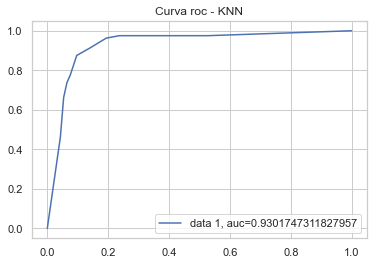

In [77]:
# Curva roc do modelo

roc_g = model_knn.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  roc_g)
auc = metrics.roc_auc_score(y_test, roc_g)
plt.title("Curva roc - KNN")
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [78]:
# Classification report do modelo

classification = classification_report(y_test, model_knn_pred)
print("Modelo 02 - K-NN")
print()
print(classification)

Modelo 02 - K-NN

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        93
           1       0.89      0.88      0.88        80

    accuracy                           0.89       173
   macro avg       0.89      0.89      0.89       173
weighted avg       0.89      0.89      0.89       173



In [79]:
# Métricas do modelos

precision = precision_score(y_test, model_knn_pred)
Recall = recall_score(y_test, model_knn_pred)
Accuracy = accuracy_score(y_test, model_knn_pred)
F1_Score = f1_score(y_test, model_knn_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
2,Accuracy,0.890173
0,precision,0.886076
3,F1_Score,0.880503
1,Recall,0.875000


**Modelo 03 - Naive bayes**

In [80]:
# Importação da biblioteca
from sklearn.naive_bayes import GaussianNB 

# Nome do algoritmo M.L
model_naive_bayes = GaussianNB() 

# Treinamento do modelo
model_naive_bayes_fit = model_naive_bayes.fit(x_train, y_train) 

# Score do modelo dados treino x y
model_naive_bayes_score = model_naive_bayes.score(x_train, y_train)
print("Modelo - Naive Bayes: %.2f" % (model_naive_bayes_score * 100)) # Score do modelo dados treino y

Modelo - Naive Bayes: 70.47


In [81]:
# Previsão do modelo - Naive bayes
model_naive_bayes_pred_predict = model_naive_bayes.predict(x_test)
model_naive_bayes_pred_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1],
      dtype=int64)

In [82]:
# Accuracy do modelo 

accuracy_nb = accuracy_score(y_test, model_naive_bayes_pred_predict)
print("Accuracy Naive bayes: %.2f" % (accuracy_nb * 100))

Accuracy Naive bayes: 63.58


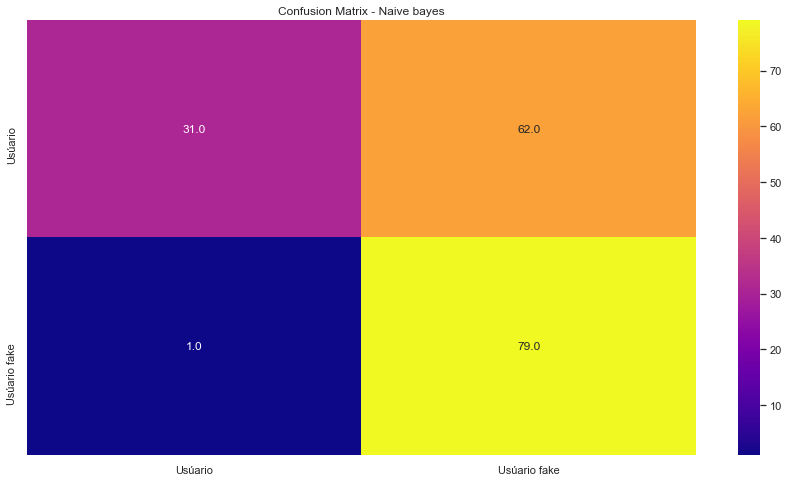

In [84]:
# Matriz de confusão
matrix_confusion_3 = confusion_matrix(y_test, model_naive_bayes_pred_predict)

# Plot matriz de confusão
plt.figure(figsize=(15, 8))

ax = plt.subplot()

sns.heatmap(matrix_confusion_3, 
            annot = True, 
            ax = ax, 
            fmt = ".1f", 
            cmap="plasma"); 

ax.set_title('Confusion Matrix - Naive bayes'); 
ax.xaxis.set_ticklabels(["Usúario", "Usúario fake"]); ax.yaxis.set_ticklabels(["Usúario", "Usúario fake"]);

roc_auc 0.8561827956989249


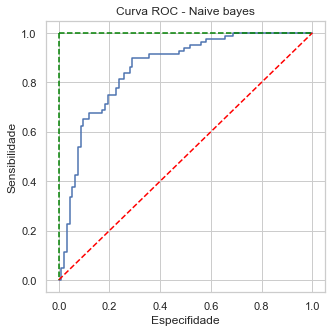

In [85]:
# Cruva roc do modelo
from sklearn.metrics import roc_curve, roc_auc_score

roc = model_naive_bayes.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC - Naive bayes')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [86]:
# Classification report
classification = classification_report(y_test, model_naive_bayes_pred_predict)
print("Modelo - Naive bayes")
print()
print(classification)

Modelo - Naive bayes

              precision    recall  f1-score   support

           0       0.97      0.33      0.50        93
           1       0.56      0.99      0.71        80

    accuracy                           0.64       173
   macro avg       0.76      0.66      0.61       173
weighted avg       0.78      0.64      0.60       173



In [87]:
# Métricas do modelo 

precision = precision_score(y_test, model_naive_bayes_pred_predict)
Recall = recall_score(y_test, model_naive_bayes_pred_predict)
Accuracy = accuracy_score(y_test, model_naive_bayes_pred_predict)
F1_Score = f1_score(y_test, model_naive_bayes_pred_predict)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
1,Recall,0.987500
3,F1_Score,0.714932
2,Accuracy,0.635838
0,precision,0.560284


**Modelo 04 - Regressão logistica**

In [88]:
%%time

# Importando biblioteca 
from sklearn.linear_model import LogisticRegression

# Nome do algoritmo M.L
model_regression_logistic = LogisticRegression()

# Treinamento do modelo
model_regression_logistic_fit = model_regression_logistic.fit(x_train, y_train)

# Score do modelo
model_regression_logistic_score = model_regression_logistic.score(x_train, y_train)
print("Modelo - Regressão logistica: %.2f" % (model_regression_logistic_score * 100))

Modelo - Regressão logistica: 91.07
Wall time: 54.9 ms


In [89]:
# Previsão do modelo
model_regression_logistic_pred = model_regression_logistic.predict(x_test)
model_regression_logistic_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1],
      dtype=int64)

In [90]:
# Accuracy score
accuracy_regression_logistic = accuracy_score(y_test, model_regression_logistic_pred)
print("Accuracy -  Logistic regression: %.2f" % (accuracy_regression_logistic * 100))

Accuracy -  Logistic regression: 91.33


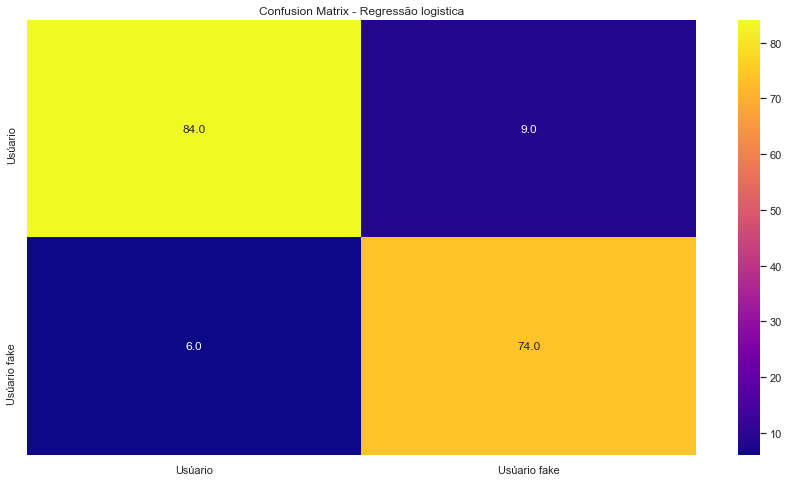

In [91]:
# Confusion matrix
matrix_confusion_4 = confusion_matrix(y_test, model_regression_logistic_pred)

# Plot Confusion matrix
plt.figure(figsize=(15, 8))

ax = plt.subplot()
sns.heatmap(matrix_confusion_4, 
            annot = True, 
            ax = ax, 
            fmt = ".1f", 
            cmap="plasma"); 
ax.set_title('Confusion Matrix - Regressão logistica'); 
ax.xaxis.set_ticklabels(["Usúario", "Usúario fake"]); ax.yaxis.set_ticklabels(["Usúario", "Usúario fake"]);

roc_auc 0.9599462365591398


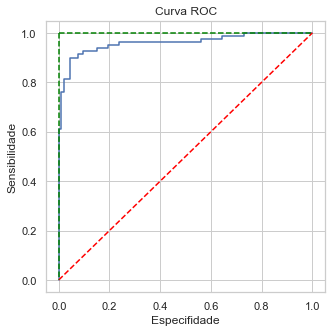

In [92]:
# Curva roc do modelo

roc = model_regression_logistic.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [93]:
# Classification report

classification = classification_report(y_test, model_regression_logistic_pred)
print("Modelo 04 - Regressão logistica")
print()
print(classification)

Modelo 04 - Regressão logistica

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        93
           1       0.89      0.93      0.91        80

    accuracy                           0.91       173
   macro avg       0.91      0.91      0.91       173
weighted avg       0.91      0.91      0.91       173



In [94]:
# Métricas do modelos

precision = precision_score(y_test, model_regression_logistic_pred)
Recall = recall_score(y_test, model_regression_logistic_pred)
Accuracy = accuracy_score(y_test, model_regression_logistic_pred)
F1_Score = f1_score(y_test, model_regression_logistic_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
1,Recall,0.925000
2,Accuracy,0.913295
3,F1_Score,0.907975
0,precision,0.891566


**Modelo 05 - XGBoost**

In [95]:
%%time

# Importando biblioteca 
from xgboost import XGBClassifier

# Nome do algoritmo M.L
xgb = XGBClassifier()

# Treinamento do modelo
xgb_fit = xgb.fit(x_train, y_train)

# Score do modelo
xgb_score = xgb.score(x_train, y_train)
print("Modelo - XGBoost: %.2f" % (xgb_score * 100))

[15:52:10] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Modelo - XGBoost: 100.00
Wall time: 118 ms


In [96]:
# Previsão do modelo - XGBoost
xgb_pred = xgb.predict(x_test)
xgb_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1],
      dtype=int64)

In [97]:
# Accuracy score
accuracy_XGBoost = accuracy_score(y_test, xgb_pred)
print("Accuracy - XGBoost: %.2f" % (accuracy_XGBoost * 100))

Accuracy - XGBoost: 91.33


In [98]:
# Classification report

classification = classification_report(y_test, xgb_pred)
print("Modelo 05 - XGBoost")
print()
print(classification)

Modelo 05 - XGBoost

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        93
           1       0.93      0.88      0.90        80

    accuracy                           0.91       173
   macro avg       0.92      0.91      0.91       173
weighted avg       0.91      0.91      0.91       173



roc_auc 0.9763440860215054


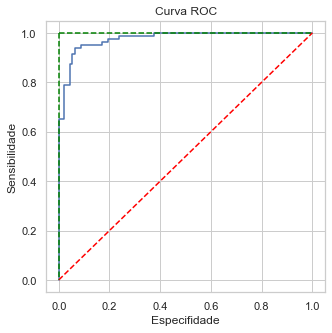

In [99]:
# Curva roc do modelo

roc = xgb.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

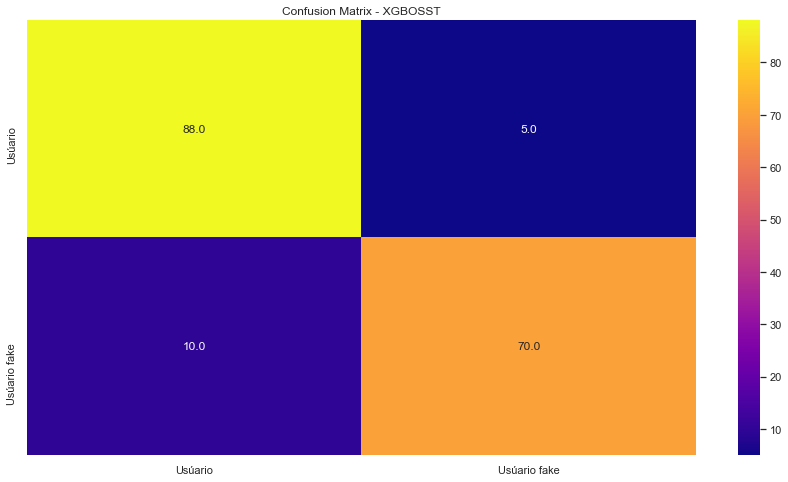

In [101]:
# Confusion matrix

matrix_confusion_5 = confusion_matrix(y_test, xgb_pred)

# Plot Confusion matrix
plt.figure(figsize=(15, 8))

ax = plt.subplot()
sns.heatmap(matrix_confusion_5, 
            annot = True, 
            ax = ax, 
            fmt = ".1f", 
            cmap="plasma"); 

ax.set_title('Confusion Matrix - XGBOSST'); 
ax.xaxis.set_ticklabels(["Usúario", "Usúario fake"]); ax.yaxis.set_ticklabels(["Usúario", "Usúario fake"]);

In [102]:
# Métricas do modelo 

recision = precision_score(y_test, xgb_pred)
Recall = recall_score(y_test, xgb_pred)
Accuracy = accuracy_score(y_test, xgb_pred)
F1_Score = f1_score(y_test, xgb_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
2,Accuracy,0.913295
3,F1_Score,0.903226
0,precision,0.891566
1,Recall,0.875000


**Modelo 06 - Gradient Boosting**

In [103]:
%%time

# Importando biblioteca
from sklearn.ensemble import GradientBoostingClassifier

# Nome do algoritmo M.L
model_gradient_boosting = GradientBoostingClassifier()

# Treinamento do modelo
model_gradient_boosting_fit = model_gradient_boosting.fit(x_train, y_train)

# Score do modelo
model_gradient_boosting_score = model_gradient_boosting.score(x_train, y_train)
print("Modelo - Gradient Boosting: %.2f" % (model_gradient_boosting_score * 100))

Modelo - Gradient Boosting: 100.00
Wall time: 147 ms


In [104]:
# Previsão do modelo - Gradient Boosting

model_gradient_boosting_pred = model_gradient_boosting.predict(x_test)
model_gradient_boosting_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1],
      dtype=int64)

In [105]:
# Accuracy score
accuracy_model_gradient_boosting = accuracy_score(y_test, model_gradient_boosting_pred)
print("Acurácia - Gradient boosting: %.2f" % (accuracy_model_gradient_boosting * 100))

Acurácia - Gradient boosting: 93.64


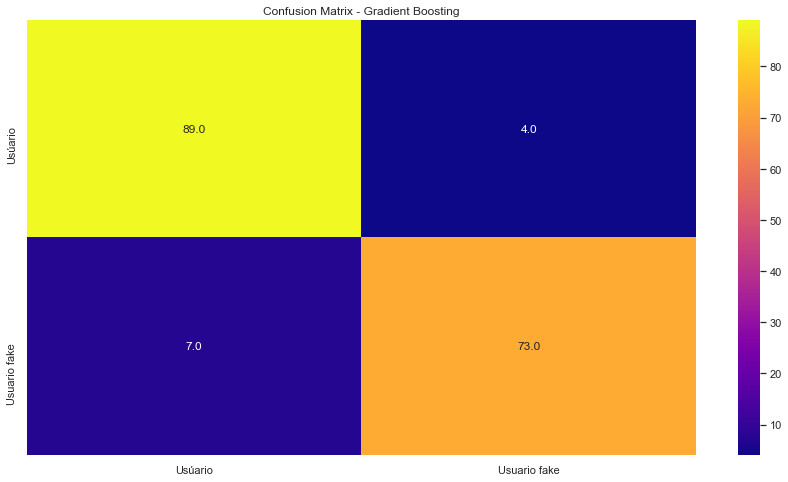

In [106]:
# Confusion matrix
matrix_confusion_6 = confusion_matrix(y_test, model_gradient_boosting_pred)

# Plot Confusion matrix
plt.figure(figsize=(15, 8))

ax = plt.subplot()
sns.heatmap(matrix_confusion_6, 
            annot = True, 
            ax = ax, 
            fmt = ".1f", 
            cmap="plasma"); 

ax.set_title('Confusion Matrix - Gradient Boosting'); 
ax.xaxis.set_ticklabels(["Usúario", "Usúario fake"]); ax.yaxis.set_ticklabels(["Usúario", "Usúario fake"]);

roc_auc 0.9798387096774193


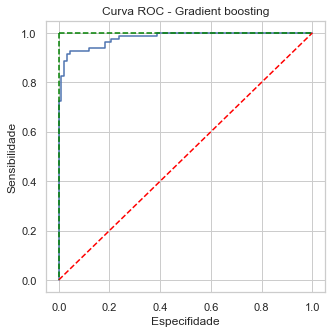

In [107]:
# Curva roc do modelo
roc = model_gradient_boosting.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC - Gradient boosting')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [108]:
# Classification report model
classification = classification_report(y_test, model_gradient_boosting_pred)

print("Modelo - 06 - Gradient boosting")
print("\n")
print(classification)

Modelo - 06 - Gradient boosting


              precision    recall  f1-score   support

           0       0.93      0.96      0.94        93
           1       0.95      0.91      0.93        80

    accuracy                           0.94       173
   macro avg       0.94      0.93      0.94       173
weighted avg       0.94      0.94      0.94       173



In [109]:
# Métricas do modelo

precision = precision_score(y_test, model_gradient_boosting_pred)
Recall = recall_score(y_test, model_gradient_boosting_pred)
Accuracy = accuracy_score(y_test, model_gradient_boosting_pred)
F1_Score = f1_score(y_test, model_gradient_boosting_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
0,precision,0.948052
2,Accuracy,0.936416
3,F1_Score,0.929936
1,Recall,0.912500


**Modelo 07 - Random Florest**

In [110]:
%%time

# Importação da biblioteca 
from sklearn.ensemble import RandomForestClassifier

# Modelo random forest classifier
model_random_forest = RandomForestClassifier(max_depth = 2, random_state = 0)

# Modelo treinamento 
model_random_forest_fit = model_random_forest.fit(x_train, y_train)

# Modelo score do modelo
model_random_forest_score = model_random_forest.score(x_train, y_train)
print("Score - Modelo random forest: %.2f" % (model_random_forest_score * 100))

Score - Modelo random forest: 93.55
Wall time: 304 ms


In [111]:
# Previsão do modelo

model_random_forest_pred = model_random_forest.predict(x_test)
model_random_forest_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1],
      dtype=int64)

In [112]:
# Accuracy do modelo
accuracy_random_forest = accuracy_score(y_test, model_random_forest_pred)

print("Acurácia - Random forest: %.2f" % (accuracy_random_forest * 100))

Acurácia - Random forest: 91.33


roc_auc 0.9669354838709677


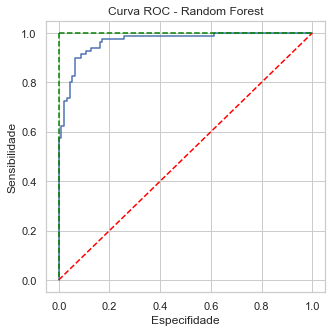

In [113]:
# Curva roc do modelo
roc = model_random_forest.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC - Random Forest')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [114]:
# Classificação report do modelo
classification = classification_report(y_test, model_random_forest_pred)

print("Modelo - 07 - Random Forest")
print()
print(classification)

Modelo - 07 - Random Forest

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        93
           1       0.92      0.89      0.90        80

    accuracy                           0.91       173
   macro avg       0.91      0.91      0.91       173
weighted avg       0.91      0.91      0.91       173



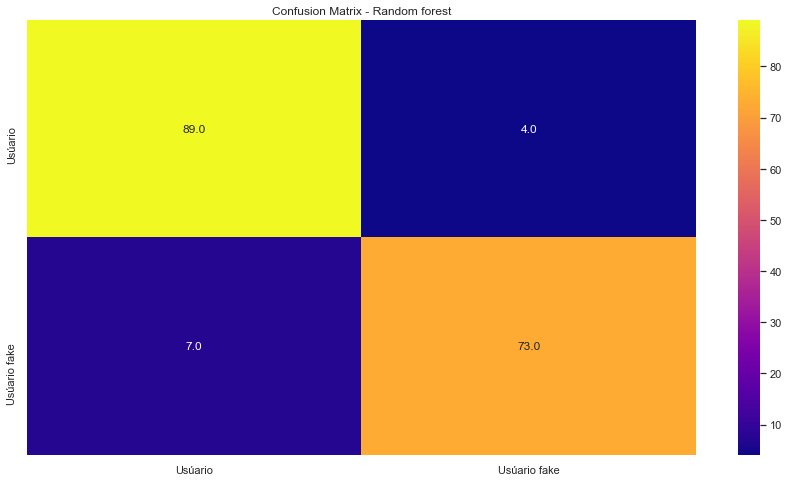

In [115]:
# confusion Matrix

matrix_confusion_7 = confusion_matrix(y_test, model_random_forest_pred)

# plot confusion Matrix
plt.figure(figsize=(15, 8))
ax = plt.subplot()

sns.heatmap(matrix_confusion_6, 
            annot=True, 
            ax = ax, 
            fmt = ".1f", 
            cmap="plasma"); 
ax.set_title('Confusion Matrix - Random forest'); 
ax.xaxis.set_ticklabels(["Usúario", "Usúario fake"]); ax.yaxis.set_ticklabels(["Usúario", "Usúario fake"]);

In [116]:
# Métricas do modelo
precision = precision_score(y_test, model_random_forest_pred)
Recall = recall_score(y_test, model_random_forest_pred)
Accuracy = accuracy_score(y_test, model_random_forest_pred)
F1_Score = f1_score(y_test, model_random_forest_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
0,precision,0.922078
2,Accuracy,0.913295
3,F1_Score,0.904459
1,Recall,0.887500


# Visualizando dados com networkx

In [129]:
#!pip install networkx
!pip install pyvis

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyvis: filename=pyvis-0.2.0-py3-none-any.whl size=23658 sha256=5ef2019962c4ed4976db42fa2d7d728efc2142dea1231fff50802bd40b838ecf
  Stored in directory: c:\users\administrador\appdata\local\pip\cache\wheels\a4\46\cd\1c1c971714678d4231d9ad830fd4fb79d2fdda5f97ec103740
Successfully built pyvis


In [137]:
# Importando biblioteca networkx
import networkx as nx

# Importando pyvis
from pyvis.network import Network

In [136]:
# Carregando pandas df a rede gráfico

fg = nx.from_pandas_edgelist(df, 
                            source='#posts', 
                            target='#follows', 
                            edge_attr='#follows')

print("Número de postagens e seguidores:", len(fg.nodes))
print("Total de postagens:", len(fg.edges))

Número de postagens e seguidores: 479
Total de postagens: 519


In [138]:
# Criando vis rede
net_d = Network(notebook=True, 
              width=1000, 
              height=600)

# Carregando a rede gráfico
net.from_nx(fg)

# show
net.show("example_insta.html")

# Resultados - Modelos machine learning recall

In [117]:
# Recall Decision Tree
recall_Decision_Tree = recall_score(y_test, model_decision_tree_pred, average='macro')

# Recall Decision K-NN
recall_Decision_knn = recall_score(y_test, model_knn_pred, average='macro')

# Recall naive bayes
recall_Naive_Bayes_GaussianNB = recall_score(y_test, model_naive_bayes_pred_predict, average='macro')

# Recall regression logistic
recall_Regression_logistic = recall_score(y_test, model_regression_logistic_pred, average='macro')

# Recall xgbost
recall_xgbost = recall_score(y_test, xgb_pred, average='macro')

# Recall Gradient boosting
recall_gradient_boosting = recall_score(y_test, model_gradient_boosting_pred, average='macro')

# Recall Random_forest
recall_Random_forest = recall_score(y_test, model_random_forest_pred, average='macro')


modelos = pd.DataFrame({
    
    "Modelos" :["Regressão logistica", 
                "K-NN", "Random Forest",
                "XGBoost", "Gradient boosting",
                "Decision Tree",
                "Naive Bayes"],

    "Recall" : [recall_Decision_Tree, 
                recall_Decision_knn, 
                recall_Naive_Bayes_GaussianNB,
                recall_Regression_logistic,
                recall_xgbost,
                recall_gradient_boosting,
                recall_Random_forest]})

modelos.sort_values(by = "Recall", ascending = False)

,Modelos,Recall
5,Decision Tree,0.934745
3,XGBoost,0.914113
6,Naive Bayes,0.911492
4,Gradient boosting,0.910618
1,K-NN,0.889113
0,Regressão logistica,0.872110
2,Random Forest,0.660417


# Resultados 2 - Acurácia dos modelos machine learning

In [118]:
# Resultados 

modelos = pd.DataFrame({
    
    "Modelos" :["Regressão logistica", 
                "K-NN", "Random Forest",
                "XGBoost", "Gradient boosting",
                "Decision Tree",
                "Naive Bayes"],

    "Acurácia" :      [accuracy_nb, 
                      accuracy_random_forest, 
                      accuracy_dt,
                      accuracy_XGBoost,
                      accuracy_model_gradient_boosting,
                      accuracy_regression_logistic,
                      accuracy_knn]})

modelos.sort_values(by = "Acurácia", ascending = False)

,Modelos,Acurácia
4,Gradient boosting,0.936416
1,K-NN,0.913295
3,XGBoost,0.913295
5,Decision Tree,0.913295
6,Naive Bayes,0.890173
2,Random Forest,0.872832
0,Regressão logistica,0.635838


# Salvando modelo ML

In [119]:
# Salvando modelo Machine learning

import pickle    
    
with open('model_decision_tree_pred.pkl', 'wb') as file:
    pickle.dump(model_decision_tree_pred, file)
    
with open('model_knn_pred.pkl', 'wb') as file:
    pickle.dump(model_knn_pred, file)
    
with open('model_naive_bayes_pred_predict.pkl', 'wb') as file:
    pickle.dump(model_naive_bayes_pred_predict, file)
    
with open('model_regression_logistic_pred.pkl', 'wb') as file:
    pickle.dump(model_regression_logistic_pred, file)
    
with open('xgb_pred.pkl', 'wb') as file:
    pickle.dump(xgb_pred, file)
    
with open('model_gradient_boosting_pred.pkl', 'wb') as file:
    pickle.dump(model_gradient_boosting_pred, file)
    
with open('model_random_forest_pred.pkl', 'wb') as file:
    pickle.dump(model_random_forest_pred, file)